<a href="https://colab.research.google.com/github/akashkodes/people_and_firearms/blob/main/people_and_guns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving data875.csv to data875.csv


In [2]:
df =  pd.read_csv('data875.csv', header=0, keep_default_na=False).values.tolist()

In [6]:
df = pd.DataFrame(df)
df.columns = ['sr_no', 'year', 'state', 'permits', 'handguns', 'long_guns', 'bg_check', 'avg_age', 'avg_education', 'avg_income', 'per_female', 'per_hispanic', 'per_white', 'per_black', 'per_native', 'per_asian', 'urb', 'region', 'pol']
print(df)

     sr_no  year          state permits  handguns  long_guns  bg_check  \
0        1  2002        Alabama       0     65294     111339    221008   
1        2  2002         Alaska       0     10504      20709     36793   
2        3  2002        Arizona   19382     53833      59906    142260   
3        4  2002       Arkansas    6163     30448      82190    153424   
4        5  2002     California  191714    235121     257323    684390   
..     ...   ...            ...     ...       ...        ...       ...   
895    896  2019       Virginia   10353    281144     173799    512766   
896    897  2019     Washington  172462    206107     128716    607170   
897    898  2019  West Virginia   31064     71036      69734    206196   
898    899  2019      Wisconsin  102078    164711     143135    435685   
899    900  2019        Wyoming    5681     23090      24923     61291   

    avg_age avg_education avg_income per_female per_hispanic per_white  \
0        48           6.6      28556 

In [8]:
#coverting all columns to numeric except state column
cols = df.columns.drop(['state', 'sr_no', 'region', 'pol'])

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [9]:
df.dtypes

sr_no              int64
year               int64
state             object
permits          float64
handguns           int64
long_guns          int64
bg_check           int64
avg_age          float64
avg_education    float64
avg_income       float64
per_female       float64
per_hispanic     float64
per_white        float64
per_black        float64
per_native       float64
per_asian        float64
urb              float64
region            object
pol               object
dtype: object

In [10]:
df.describe()

,sr_no,year,permits,handguns,long_guns,bg_check,avg_age,avg_education,avg_income,per_female,per_hispanic,per_white,per_black,per_native,per_asian,urb
count,900.000000,900.000000,8.980000e+02,900.000000,900.000000,9.000000e+02,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,900.000000
mean,450.500000,2010.500000,1.061589e+05,91201.080000,103643.123333,3.365421e+05,49.134921,7.155556,38539.013605,50.436508,6.859524,83.248299,7.279138,1.797959,3.615420,10.205800
std,259.951919,5.191012,3.385984e+05,113413.447937,101055.119318,4.877031e+05,1.822094,0.307562,7381.334818,1.215182,7.588062,12.204376,7.402326,4.089273,7.426545,1.801177
min,1.000000,2002.000000,0.000000e+00,0.000000,0.000000,6.521000e+03,42.000000,6.200000,23626.000000,46.000000,0.500000,26.400000,0.200000,0.100000,0.300000,0.000000
25%,225.750000,2006.000000,3.525000e+01,20361.750000,38241.750000,9.119725e+04,48.000000,6.900000,33200.000000,50.000000,2.125000,76.700000,1.600000,0.300000,1.000000,9.590000
50%,450.500000,2010.500000,1.838650e+04,52257.500000,81607.500000,1.974705e+05,49.000000,7.100000,37670.000000,51.000000,4.300000,86.450000,5.100000,0.500000,1.700000,10.365000
75%,675.250000,2015.000000,8.995375e+04,119705.750000,137806.500000,3.729932e+05,50.000000,7.300000,42634.250000,51.000000,7.500000,92.000000,10.500000,1.200000,3.475000,11.150000
max,900.000000,2019.000000,4.655016e+06,662308.000000,873543.000000,4.949570e+06,54.000000,8.000000,67002.000000,54.000000,38.200000,97.700000,34.100000,32.300000,56.800000,12.560000


In [11]:
#combining handguns and longguns as we are exploring gun sales in general.
df['total_arms'] = df['handguns'] + df['long_guns']

In [12]:
df.head

<bound method NDFrame.head of      sr_no  year          state   permits  handguns  long_guns  bg_check  \
0        1  2002        Alabama       0.0     65294     111339    221008   
1        2  2002         Alaska       0.0     10504      20709     36793   
2        3  2002        Arizona   19382.0     53833      59906    142260   
3        4  2002       Arkansas    6163.0     30448      82190    153424   
4        5  2002     California  191714.0    235121     257323    684390   
..     ...   ...            ...       ...       ...        ...       ...   
895    896  2019       Virginia   10353.0    281144     173799    512766   
896    897  2019     Washington  172462.0    206107     128716    607170   
897    898  2019  West Virginia   31064.0     71036      69734    206196   
898    899  2019      Wisconsin  102078.0    164711     143135    435685   
899    900  2019        Wyoming    5681.0     23090      24923     61291   

     avg_age  avg_education  avg_income  per_female  per_

Exploring the dataset by plotting gun sales against various demographics to see if there is a particular pattern.

<Axes: title={'center': 'PerWhite vs TotalArms'}, xlabel='per_white', ylabel='total_arms'>

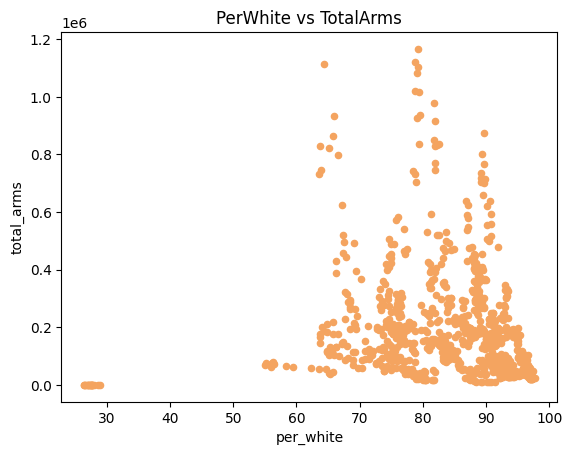

In [13]:
df.plot.scatter(x = 'per_white', y = 'total_arms',
                  color = 'sandybrown', title = 'PerWhite vs TotalArms')

<Axes: title={'center': 'PerBlack vs TotalArms'}, xlabel='per_black', ylabel='total_arms'>

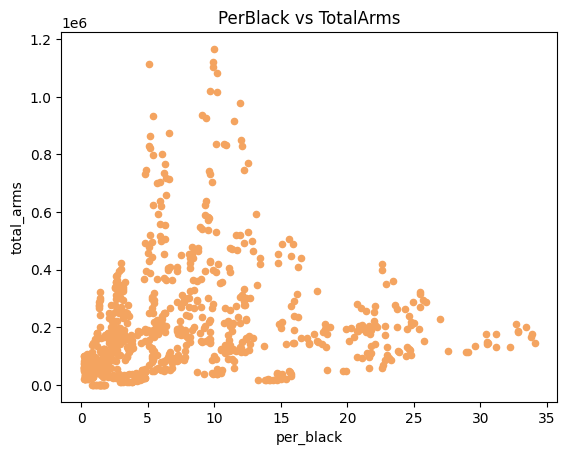

In [14]:
df.plot.scatter(x = 'per_black', y = 'total_arms',
                  color = 'sandybrown', title = 'PerBlack vs TotalArms')

<Axes: title={'center': 'PerAsian vs TotalArms'}, xlabel='per_asian', ylabel='total_arms'>

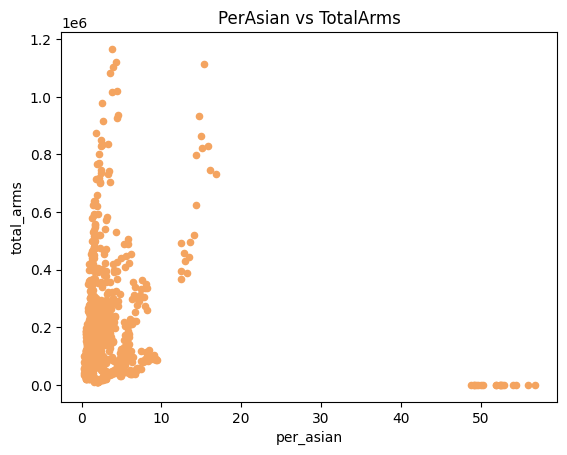

In [15]:
df.plot.scatter(x = 'per_asian', y = 'total_arms',
                  color = 'sandybrown', title = 'PerAsian vs TotalArms')

<Axes: title={'center': 'PerHispanic vs TotalArms'}, xlabel='per_hispanic', ylabel='total_arms'>

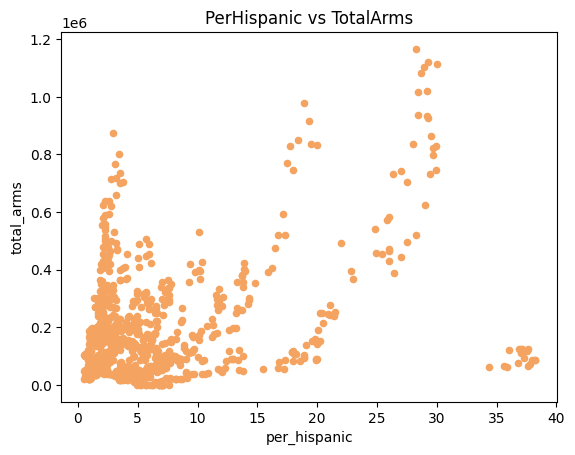

In [16]:
df.plot.scatter(x = 'per_hispanic', y = 'total_arms',
                  color = 'sandybrown', title = 'PerHispanic vs TotalArms')

<Axes: title={'center': 'PerNative vs TotalArms'}, xlabel='per_native', ylabel='total_arms'>

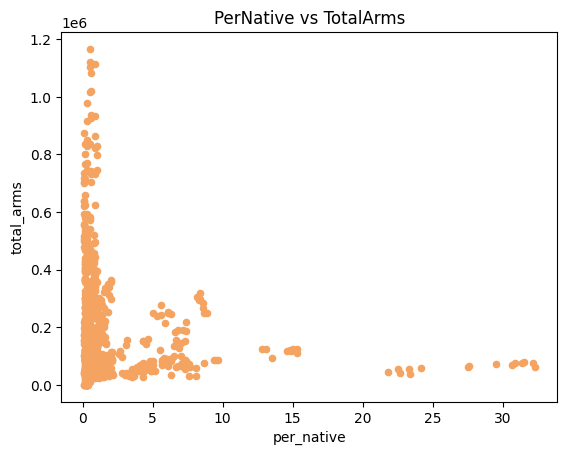

In [17]:
df.plot.scatter(x = 'per_native', y = 'total_arms',
                  color = 'sandybrown', title = 'PerNative vs TotalArms')

<Axes: title={'center': 'PerWhite vs TotalArms'}, xlabel='avg_education', ylabel='total_arms'>

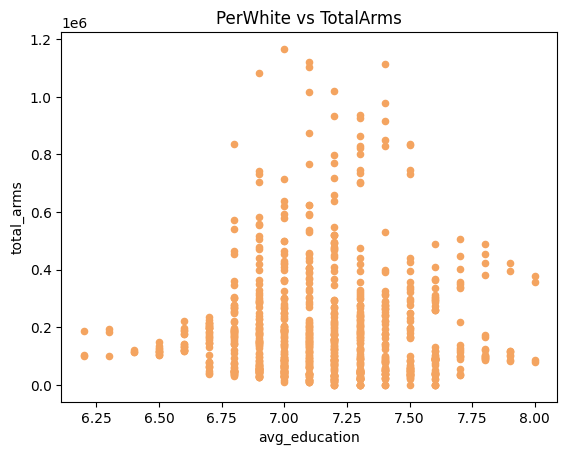

In [18]:
df.plot.scatter(x = 'avg_education', y = 'total_arms',
                  color = 'sandybrown', title = 'PerWhite vs TotalArms')

<Axes: title={'center': 'PerWhite vs TotalArms'}, xlabel='avg_age', ylabel='total_arms'>

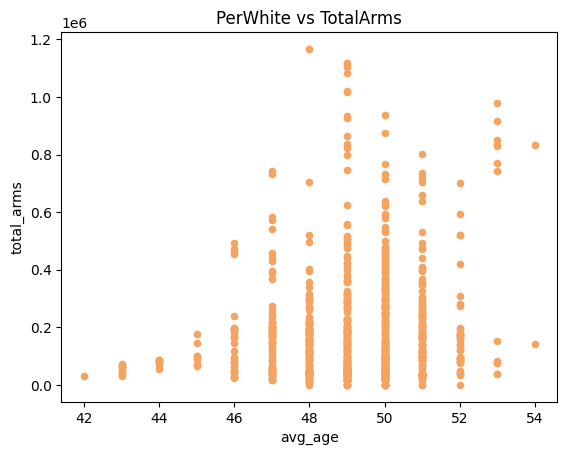

In [19]:
df.plot.scatter(x = 'avg_age', y = 'total_arms',
                  color = 'sandybrown', title = 'PerWhite vs TotalArms')

<Axes: title={'center': 'PerWhite vs TotalArms'}, xlabel='avg_income', ylabel='total_arms'>

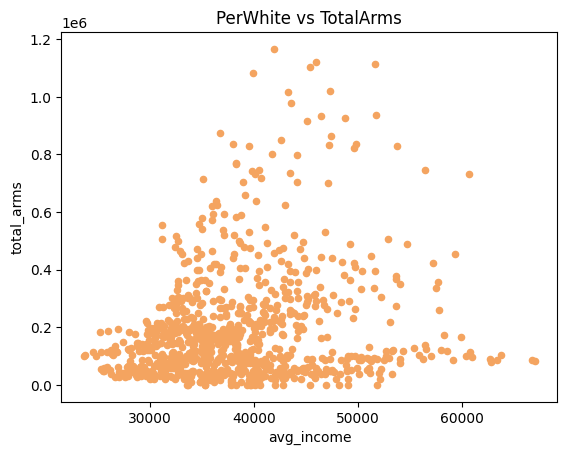

In [20]:
df.plot.scatter(x = 'avg_income', y = 'total_arms',
                  color = 'sandybrown', title = 'PerWhite vs TotalArms')

In [21]:
pip install seaborn

In [22]:
pip install seaborn[stats]

In [23]:
import seaborn as sns

In [24]:
pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [25]:
import matplotlib.pyplot as plt

Tracking the number of gun sales and permits from year 2002 to 2017

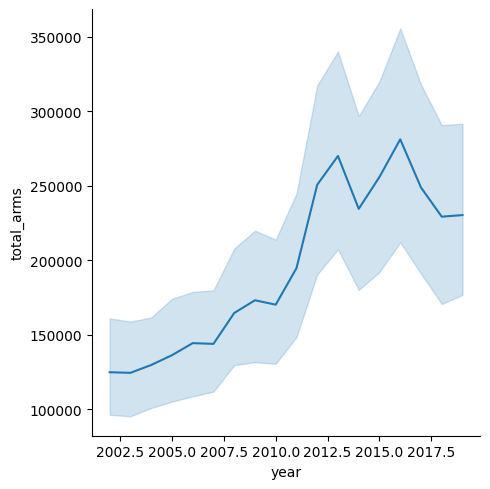

In [26]:
sns.relplot(data=df, x="year", y="total_arms", kind="line")

<Figure size 1500x800 with 0 Axes>

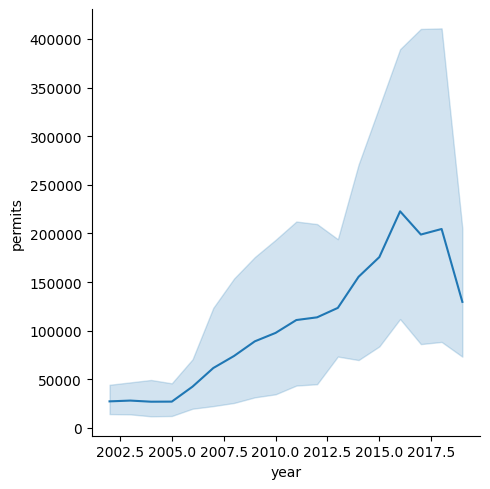

In [27]:
plt.figure(figsize=(15,8))
sns.relplot(data=df, x="year", y="permits", kind="line")

'shows two distinct pictures of the different states. On one hand, some states have almost no change in the sales of firearms over time like Wyoming, Montana, and South Carolina.\nWhile on the other hand, some states have consistently bought more and more guns like California and Texas. '

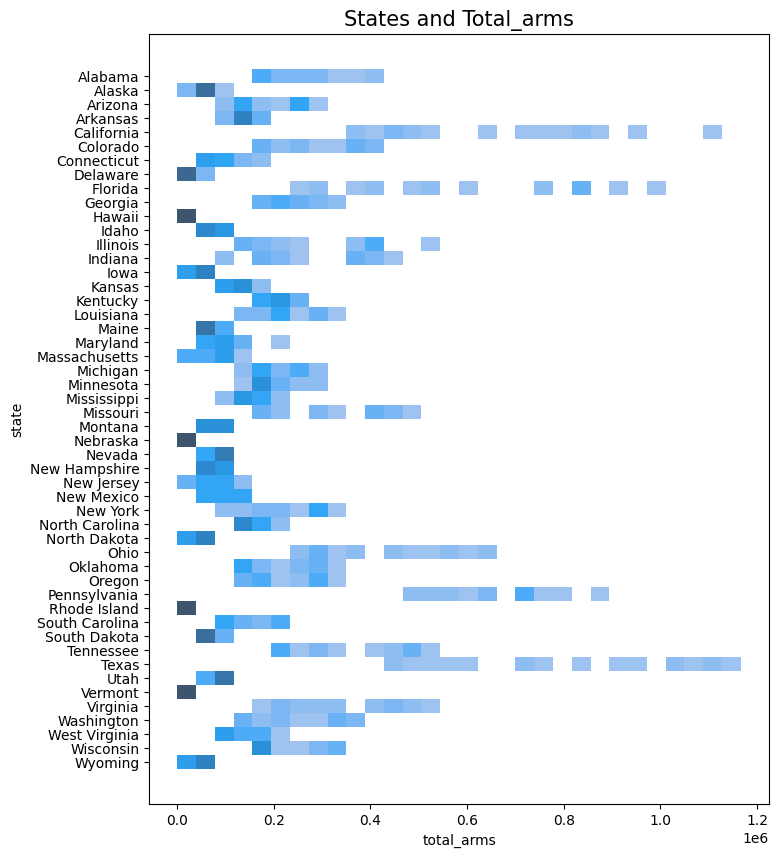

In [28]:
plt.figure(figsize=(8,10))
sns.histplot(data=df, x= "total_arms", y="state")
plt.xlabel('total_arms', fontsize=10);
plt.ylabel('state', fontsize=10);
plt.title('States and Total_arms', fontsize=15)

"""shows two distinct pictures of the different states. On one hand, some states have almost no change in the sales of firearms over time like Wyoming, Montana, and South Carolina.
While on the other hand, some states have consistently bought more and more guns like California and Texas. """


' This shows a pattern that indicates there is some correlation between age and total firearms sold. As the average age increases there is a significant increase in total firearms sold as well.\nAt the same time, some states continue to represent lower sales in relation to their counterparts. This can be seen by data points still present towards the lower end of the graph across all ages.\nAlthough there are some outliers, the overall trend is bell-shaped yet slightly skewed towards the right.The age range of 48 and 50 represents the maximum height of firearm sales.\nThe fact that sales seem to mostly drop after this age range seems to indicate there are one or more variables that are also influencing the variable of interest.'

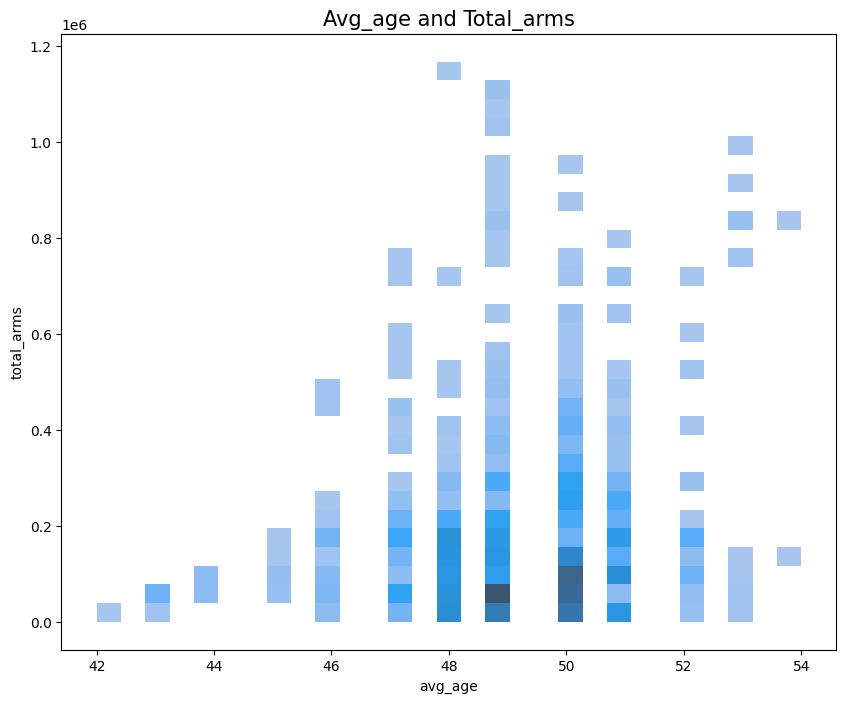

In [29]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x= "avg_age", y="total_arms")
plt.title('Avg_age and Total_arms', fontsize=15)

""" This shows a pattern that indicates there is some correlation between age and total firearms sold. As the average age increases there is a significant increase in total firearms sold as well.
At the same time, some states continue to represent lower sales in relation to their counterparts. This can be seen by data points still present towards the lower end of the graph across all ages.
Although there are some outliers, the overall trend is bell-shaped yet slightly skewed towards the right.The age range of 48 and 50 represents the maximum height of firearm sales.
The fact that sales seem to mostly drop after this age range seems to indicate there are one or more variables that are also influencing the variable of interest."""

<ipython-input-30-45510eff1989>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm') #Creates a heatmap. df.corr() = creates a corr table of the dataframe.


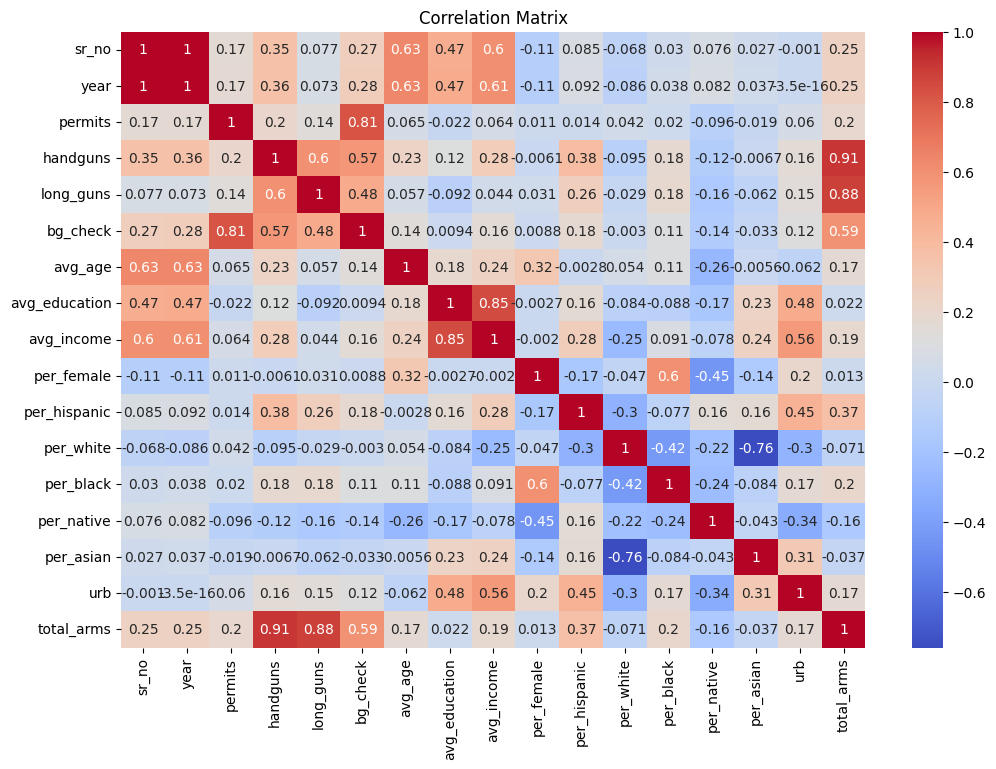

In [30]:
plt.figure(figsize =(12,8)) #Sets the size of Plot.
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm') #Creates a heatmap. df.corr() = creates a corr table of the dataframe.
plt.title('Correlation Matrix')
plt.show()

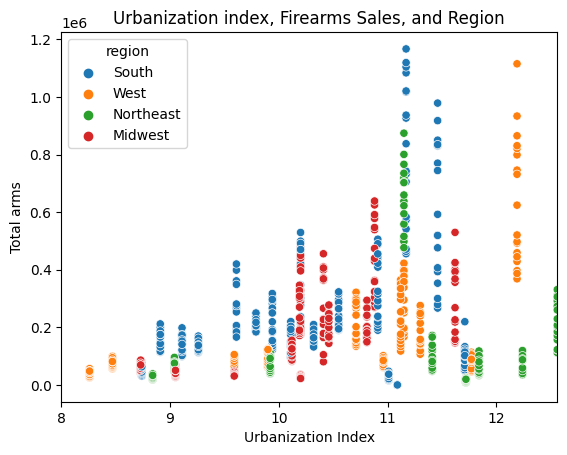

In [32]:
sns.scatterplot(x='urb', y='total_arms', hue='region', data=df)

# Set x-axis limits
plt.xlim(8, max(df['urb']))

# Add labels and title
plt.xlabel('Urbanization Index')
plt.ylabel('Total arms')
plt.title('Urbanization index, Firearms Sales, and Region')

# Display the plot
plt.show()

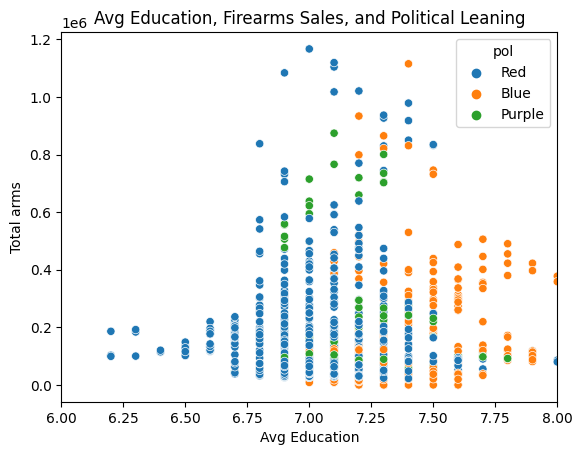

In [35]:
sns.scatterplot(x='avg_education', y='total_arms', hue='pol', data=df)

# Set x-axis limits
plt.xlim(6, max(df['avg_education']))

# Add labels and title
plt.xlabel('Avg Education')
plt.ylabel('Total arms')
plt.title('Avg Education, Firearms Sales, and Political Leaning')

# Display the plot
plt.show()